<a href="https://colab.research.google.com/github/UNSW-ZZSC9020-2023H2/project/blob/main/src/GoogleColab.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exploratory Analysis Notebook 
The goal of this workbook is to explore the data and the relationships within for use in downstream modelling.

## Ideas
- Check literature first for what's already been done and ideas before embarking on time-consuming stuff.
- Then think about business use cases for the relationship between temperature and demand.
- Can we incorporate other data?

## Setup

In [51]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [32]:
temp = pd.read_csv('../data/raw/temperature_nsw.csv')
demand = pd.read_csv('../data/raw/totaldemand_nsw.csv')
demand_forecast = pd.read_csv('../data/raw/forecastdemand_nsw.csv')

## Temperature Analysis

### General

In [58]:
temp.head(-1)

,DATETIME,LOCATION,TEMPERATURE
0,2010-01-01 00:00:00,94766.0,23.1
1,2010-01-01 00:01:00,94766.0,23.1
2,2010-01-01 00:30:00,94766.0,22.9
3,2010-01-01 00:50:00,94766.0,22.7
4,2010-01-01 01:00:00,94766.0,22.6
...,...,...,...
247640,2022-07-31 21:30:00,94766.0,14.0
247641,2022-07-31 22:00:00,94766.0,14.0
247642,2022-07-31 22:30:00,94766.0,13.2
247643,2022-07-31 23:00:00,94766.0,13.3


In [34]:
# Check NAs
temp['TEMPERATURE'].isnull().sum()

0

In [35]:
# Remove outlier at -9999
temp.drop(temp[temp['TEMPERATURE'] <= -9999].index, inplace = True)

In [36]:
temp.describe()

,LOCATION,TEMPERATURE
count,247627.0,247627.000000
mean,94766.0,17.286950
std,0.0,5.820358
min,94766.0,-1.300000
25%,94766.0,13.300000
50%,94766.0,17.600000
75%,94766.0,21.200000
max,94766.0,44.700000


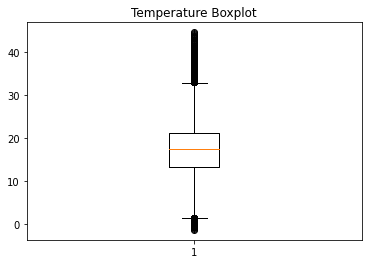

In [37]:
plt.boxplot(x=temp["TEMPERATURE"])
plt.title("Temperature Boxplot")
plt.savefig("../images/exploratory/temperature-boxplot.png")

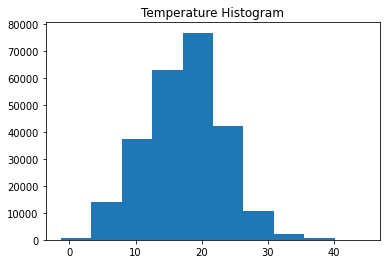

In [38]:
plt.hist(x=temp["TEMPERATURE"])
plt.title("Temperature Histogram")
plt.savefig("../images/exploratory/temperature-histogram.png")

### Time Statistics 

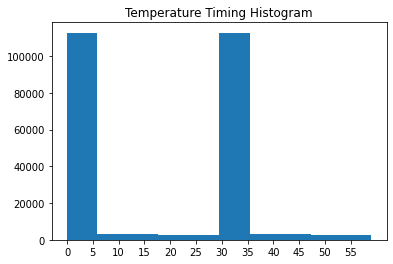

In [115]:
# Histogram plot of the measurement minute time.
plt.hist(x=pd.to_datetime(temp["DATETIME"]).dt.minute)
plt.title("Temperature Timing Histogram")
plt.xticks(np.arange(0,60,step=5))
plt.savefig("../images/exploratory/temperature-timing-histogram.png")

In [134]:
# This shows that there are some minute values not either 0 or 30
sum(pd.to_datetime(temp["DATETIME"]).dt.minute % 30)

389318

## Demand Analysis

### General

In [56]:
demand.head(-1)

,DATETIME,REGIONID,TOTALDEMAND
0,2010-01-01 00:00:00,NSW1,7997.41
1,2010-01-01 00:05:00,NSW1,7946.51
2,2010-01-01 00:10:00,NSW1,7921.55
3,2010-01-01 00:15:00,NSW1,7837.84
4,2010-01-01 00:20:00,NSW1,7781.11
...,...,...,...
1323392,2022-07-31 23:35:00,NSW1,8275.87
1323393,2022-07-31 23:40:00,NSW1,8180.34
1323394,2022-07-31 23:45:00,NSW1,8237.50
1323395,2022-07-31 23:50:00,NSW1,8109.83


In [40]:
demand.describe()

,TOTALDEMAND
count,1.323398e+06
mean,8.067966e+03
std,1.308206e+03
min,4.286190e+03
25%,7.097480e+03
50%,7.996510e+03
75%,8.914310e+03
max,1.464883e+04


In [41]:
demand['TOTALDEMAND'].isnull().sum()

0

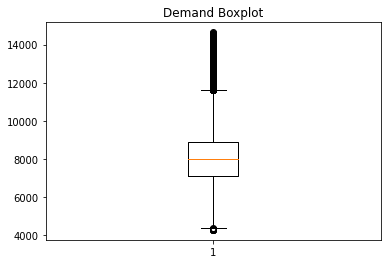

In [42]:
plt.boxplot(x=demand["TOTALDEMAND"])
plt.title("Demand Boxplot")
plt.savefig("../images/exploratory/demand-boxplot.png")

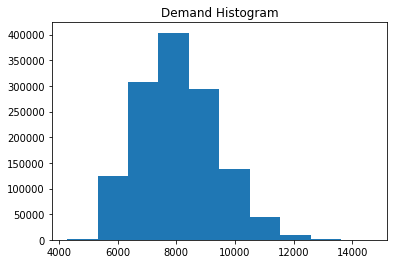

In [43]:
plt.hist(x=demand["TOTALDEMAND"])
plt.title("Demand Histogram")
plt.savefig("../images/exploratory/demand-histogram.png")

### Time Statistics

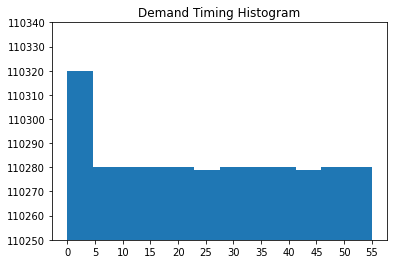

In [135]:
# Histogram plot of the measurement minute time.
plt.hist(x=pd.to_datetime(demand["DATETIME"]).dt.minute, bins=12)
plt.xticks(np.arange(0,60,step=5))
plt.ylim([110250, 110340])
plt.title("Demand Timing Histogram")
plt.savefig("../images/exploratory/demand-timing-histogram.png")

In [136]:
# All time interval minutes are 0 or 5
sum(pd.to_datetime(demand["DATETIME"]).dt.minute % 5)

0

## Previously Forecasted Demand 

In [59]:
demand_forecast.head(-1)

,DATETIME,REGIONID,FORECASTDEMAND,PREDISPATCHSEQNO,PERIODID,LASTCHANGED
0,2010-01-01 00:00:00,NSW1,7832.04,2009123018,71,2009-12-30 12:31:49
1,2010-01-01 00:00:00,NSW1,7832.04,2009123019,70,2009-12-30 13:01:43
2,2010-01-01 00:00:00,NSW1,7832.03,2009123020,69,2009-12-30 13:31:36
3,2010-01-01 00:00:00,NSW1,7832.03,2009123021,68,2009-12-30 14:01:44
4,2010-01-01 00:00:00,NSW1,7830.96,2009123022,67,2009-12-30 14:31:35
...,...,...,...,...,...,...
11619497,2022-08-01 00:00:00,NSW1,8246.38,2022073135,6,2022-07-31 21:02:05
11619498,2022-08-01 00:00:00,NSW1,8227.36,2022073136,5,2022-07-31 21:32:14
11619499,2022-08-01 00:00:00,NSW1,8175.04,2022073137,4,2022-07-31 22:01:54
11619500,2022-08-01 00:00:00,NSW1,8145.10,2022073138,3,2022-07-31 22:32:00


In [45]:
demand_forecast.describe()

,FORECASTDEMAND,PREDISPATCHSEQNO,PERIODID
count,1.161950e+07,1.161950e+07,1.161950e+07
mean,8.044976e+03,2.015718e+09,2.999162e+01
std,1.326532e+03,3.667742e+06,1.870715e+01
min,4.317310e+03,2.009123e+09,1.000000e+00
25%,7.049500e+03,2.012123e+09,1.400000e+01
50%,7.978180e+03,2.015122e+09,2.800000e+01
75%,8.908280e+03,2.019051e+09,4.400000e+01
max,1.473666e+04,2.022073e+09,7.900000e+01


In [46]:
demand_forecast.isnull().sum()

DATETIME            0
REGIONID            0
FORECASTDEMAND      0
PREDISPATCHSEQNO    0
PERIODID            0
LASTCHANGED         0
dtype: int64

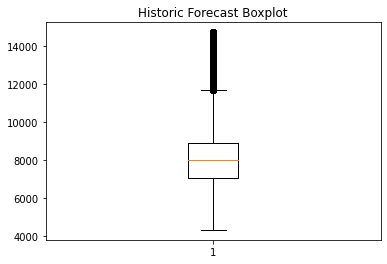

In [47]:
plt.boxplot(demand_forecast["FORECASTDEMAND"])
plt.title("Historic Forecast Boxplot")
plt.savefig("../images/exploratory/historic-forecast-boxplot.png")

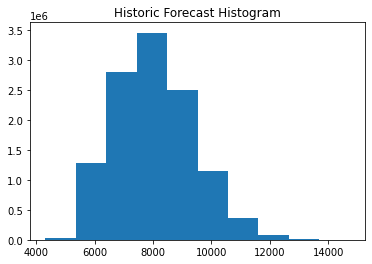

In [48]:
plt.hist(x=demand_forecast["FORECASTDEMAND"])
plt.title("Historic Forecast Histogram")
plt.savefig("../images/exploratory/historic-forecast-histogram.png")

### Time Statistics